In [1]:
from mountain import Mountain_one, Mountain_two

import numpy as np
from typing import Tuple
import os
import matplotlib.pyplot as plt 

adad c:\Users\kasgr\OneDrive\Dokumenter\Master i Informatikk\INF266\GITproject2\inf266_problem_set_2
Policy evaluation converged after 99 iterations.
Policy evaluation converged after 1 iterations.


In [2]:
def policy_evaluation1(env, policy, theta=1e-6, gamma=1.0):
    """
    Evaluates a policy π by iterating until convergence.
    
    Args:
    env -- Mountain environment instance
    policy -- Dictionary mapping states to actions
    theta -- Convergence threshold
    gamma -- Discount factor (default: 1 for undiscounted rewards)

    Returns:
    V -- Dictionary of state values
    """
    V = { (i, j): 0 for i in range(31) for j in range(100) }  # Initialize V(s) = 0

    while True:
        delta = 0
        for state in V:
            action = policy[state]
            next_state, reward = env.next_state(state, action), env.get_reward(state, action)
            new_value = reward + gamma * V[next_state]
            delta = max(delta, abs(new_value - V[state]))
            V[state] = new_value
        
        if delta < theta:
            break  # Stop when changes are small (converged)

    return V

In [3]:
def policy_evaluation2(env, policy, theta=1e-6, gamma=1.0, order="left-right", max_iters=50, min_iters=10):
    """
    Evaluates a policy with different state ordering, ensuring at least 'min_iters' iterations.
    
    Args:
        env -- Mountain environment
        policy -- Dictionary mapping states to actions
        theta -- Convergence threshold
        gamma -- Discount factor
        order -- "left-right" or "right-left"
        max_iters -- Maximum iterations for evaluation
        min_iters -- Minimum iterations before checking convergence.
    
    Returns:
        V -- Dictionary of state values
    """
    V = { (i, j): 0 for i in range(31) for j in range(100) }
    states = sorted(V.keys(), key=lambda x: x[1]) if order == "left-right" else sorted(V.keys(), key=lambda x: -x[1])
    
    for iteration in range(max_iters):
        delta = 0
        for state in states:
            action = policy[state]
            next_state, reward = env.next_state(state, action), env.get_reward(state, action)
            new_value = reward + gamma * V[next_state]
            delta = max(delta, abs(new_value - V[state]))
            V[state] = new_value
        
        # Force at least 'min_iters' iterations before checking convergence
        if iteration >= min_iters and delta < theta:
            print(f"Converged at iteration {iteration}, Order: {order}")
            break

        if iteration % 10 == 0:  # Print every 10 iterations
            print(f"Iteration {iteration}, Order: {order}, Value at (15,0): {V[(15,0)]}")

    return V


In [4]:
def straight_forward_policy(state):
    return "forward"

In [5]:
env = Mountain_one()
policy = { (i, j): straight_forward_policy((i, j)) for i in range(31) for j in range(100) }
V_pi_str = policy_evaluation1(env, policy)

print("Value function for π_str computed.")

Value function for π_str computed.


In [6]:
env = Mountain_one()

# Define a straight-forward policy
def straight_forward_policy(state):
    return "forward"





In [7]:
# Compare values
V_left_right = policy_evaluation2(env, policy, order="left-right")
print(f"Final Value at (15,0) - Left-to-Right: {V_left_right[(15,0)]}")

Iteration 0, Order: left-right, Value at (15,0): -0.31764707
Iteration 10, Order: left-right, Value at (15,0): -7.329411799999999
Iteration 20, Order: left-right, Value at (15,0): -14.686274619999999
Iteration 30, Order: left-right, Value at (15,0): -22.894118249999995
Iteration 40, Order: left-right, Value at (15,0): -30.65882427
Final Value at (15,0) - Left-to-Right: -35.921569579999996


In [8]:

V_right_left = policy_evaluation2(env, policy, order="right-left")

print(f"Final Value at (15,0) - Right-to-Left: {V_right_left[(15,0)]}")

Iteration 0, Order: right-left, Value at (15,0): -57.80784459
Converged at iteration 10, Order: right-left
Final Value at (15,0) - Right-to-Left: -57.80784459


In [9]:
#Consider the two polices evaluation in run with the different ordering of
#states. Did you learn something different between them?
#The two value functions are the same, but the order in which the states are evaluated can affect the number of iterations required to converge.


In [10]:
def policy_iteration(env, gamma=1.0):
    """
    Runs the policy iteration algorithm to find an optimal policy.
    """
    policy = { (i, j): "forward" for i in range(31) for j in range(100) }  # Initialize random policy
    V = { (i, j): 0 for i in range(31) for j in range(100) }

    while True:
        # Policy Evaluation
        V = policy_evaluation2(env, policy, gamma=gamma)
        
        # Policy Improvement
        policy_stable = True
        for state in V:
            best_action = None
            best_value = float('-inf')

            for action in env.actions:
                next_state, reward = env.next_state(state, action), env.get_reward(state, action)
                value = reward + gamma * V[next_state]

                if value > best_value:
                    best_value = value
                    best_action = action

            if best_action != policy[state]:  # If policy changes, keep iterating
                policy_stable = False
                policy[state] = best_action
        
        if policy_stable:
            break

    return policy, V

In [11]:
env = Mountain_one()
optimal_policy, V_opt = policy_iteration(env)

print("Optimal policy computed using policy iteration.")


Iteration 0, Order: left-right, Value at (15,0): -0.31764707
Iteration 10, Order: left-right, Value at (15,0): -7.329411799999999
Iteration 20, Order: left-right, Value at (15,0): -14.686274619999999
Iteration 30, Order: left-right, Value at (15,0): -22.894118249999995
Iteration 40, Order: left-right, Value at (15,0): -30.65882427
Iteration 0, Order: left-right, Value at (15,0): -0.3137255
Iteration 10, Order: left-right, Value at (15,0): -5.254902060000001
Iteration 20, Order: left-right, Value at (15,0): -13.40000023
Iteration 30, Order: left-right, Value at (15,0): -15.752941504999999
Iteration 40, Order: left-right, Value at (15,0): -18.862745535
Iteration 0, Order: left-right, Value at (15,0): -0.31764707
Iteration 10, Order: left-right, Value at (15,0): -3.2431373199999998
Iteration 20, Order: left-right, Value at (15,0): -6.125490379999999
Iteration 30, Order: left-right, Value at (15,0): -8.39607869
Iteration 40, Order: left-right, Value at (15,0): -9.909804205
Iteration 0, Ord

In [12]:
def value_iteration(env, theta=1e-6, gamma=1.0):
    """
    Computes the optimal policy using Value Iteration.
    """
    V = { (i, j): 0 for i in range(31) for j in range(100) }

    while True:
        delta = 0
        for state in V:
            best_value = float('-inf')

            for action in env.actions:
                next_state, reward = env.next_state(state, action), env.get_reward(state, action)
                value = reward + gamma * V[next_state]

                best_value = max(best_value, value)

            delta = max(delta, abs(best_value - V[state]))
            V[state] = best_value
        
        if delta < theta:
            break  # Convergence check

    # Extract optimal policy
    optimal_policy = {}
    for state in V:
        best_action = max(env.actions, key=lambda a: env.get_reward(state, a) + gamma * V[env.next_state(state, a)])
        optimal_policy[state] = best_action

    return optimal_policy, V

In [13]:
env = Mountain_one()
optimal_policy_vi, V_vi = value_iteration(env)

print("Optimal policy computed using value iteration.")

Optimal policy computed using value iteration.


In [14]:
def plot_trajectory(env, policy, start_state):
    state = start_state
    trajectory = [state]
    while state[1] < 99:
        action = policy[state]
        state = env.next_state(state, action)
        trajectory.append(state)
    x_vals, y_vals = zip(*trajectory)
    
    # Plot terrain
    plt.figure(figsize=(10, 5))
    plt.imshow(env.get_map(), cmap='terrain', origin='upper')
    plt.colorbar(label='Roughness')
    
    # Plot trajectory on top
    plt.plot(y_vals, x_vals, marker='o', linestyle='-', color='red', label='Trajectory')
    plt.xlabel("Column (x)")
    plt.ylabel("Row (y)")
    plt.title("Robot Trajectory on Terrain")
    plt.legend()
    plt.show()


starting from (15,0)


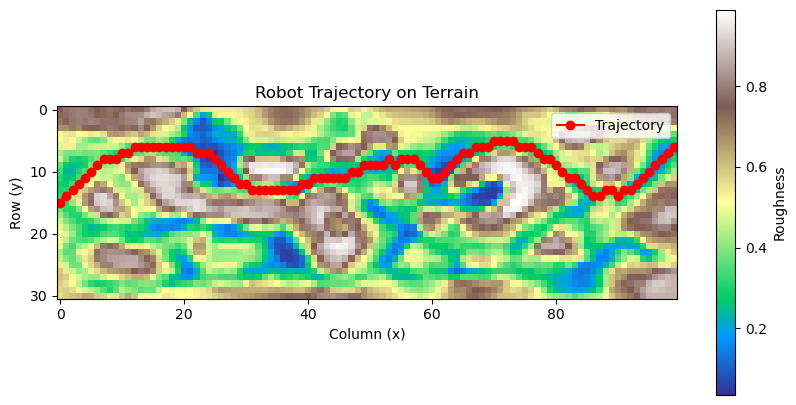

starting from (3,0)


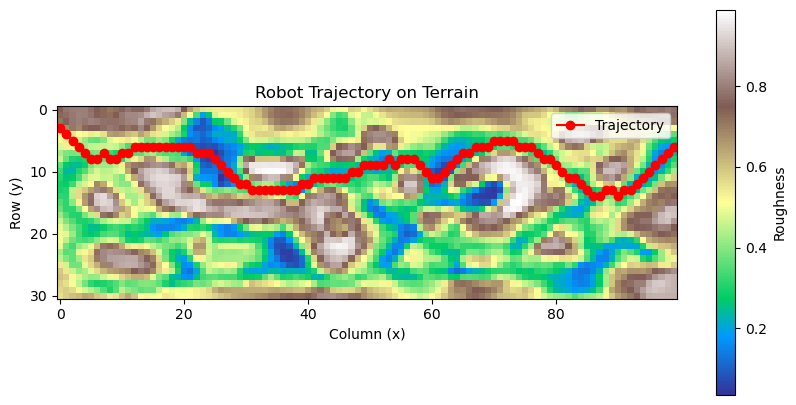

In [15]:
env = Mountain_one()
print("starting from (15,0)")
plot_trajectory(env, optimal_policy, (15, 0))  # Start from (15,0)
print("starting from (3,0)")
plot_trajectory(env, optimal_policy, (3, 0))   # Start from (3,0)

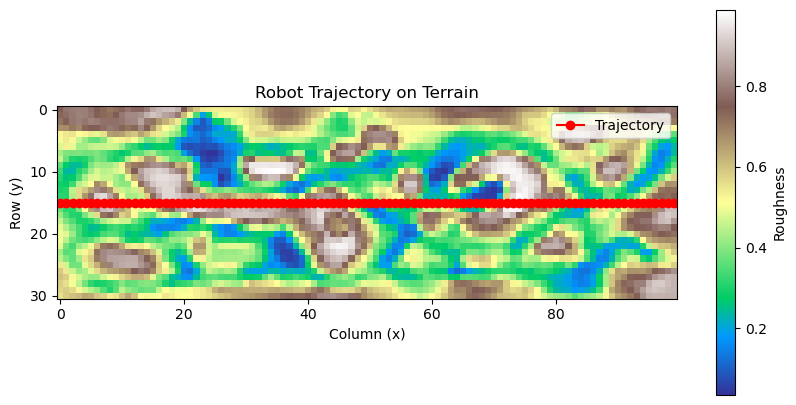

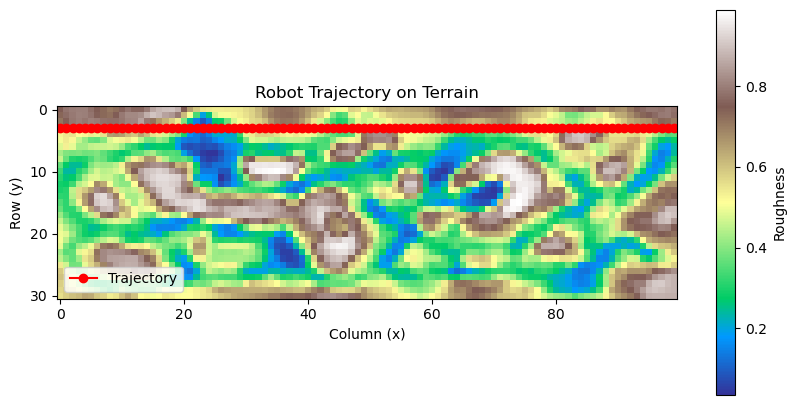

In [16]:
env = Mountain_one()
policy = { (i, j): straight_forward_policy((i, j)) for i in range(31) for j in range(100) }

plot_trajectory(env, policy, (15, 0))  # Start from (15,0)
plot_trajectory(env, policy, (3, 0))   # Start from (3,0)


# best start row

In [17]:
#iterate the different rows, 

def find_best_row(env,policy):

    num_rows = np.shape(env.get_map())[0]
    best_row = None
    best_value = float('-inf')
    val = policy_evaluation2(env, policy, order="left-right")
    for row in range(num_rows):
        v =  val[(row,0)] 
        if v > best_value:
            best_value = v
            best_row = row
    return best_row, best_value

env = Mountain_one()


Iteration 0, Order: left-right, Value at (15,0): -0.31764707
Iteration 10, Order: left-right, Value at (15,0): -7.329411799999999
Iteration 20, Order: left-right, Value at (15,0): -14.686274619999999
Iteration 30, Order: left-right, Value at (15,0): -22.894118249999995
Iteration 40, Order: left-right, Value at (15,0): -30.65882427


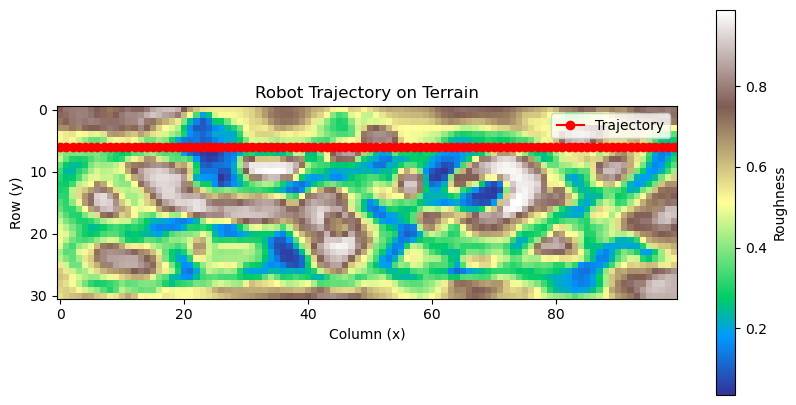

In [18]:
policy = { (i, j): straight_forward_policy((i, j)) for i in range(31) for j in range(100) }
env = Mountain_one()

row, val = find_best_row(env, policy)
plot_trajectory(env, policy, (row, 0))  # Start from best row

In [19]:
print(f"Best row: {row}, Value: {val}") 

Best row: 6, Value: -17.192157525


Iteration 0, Order: left-right, Value at (15,0): -0.31764707
Iteration 10, Order: left-right, Value at (15,0): -5.796078459999999
Iteration 20, Order: left-right, Value at (15,0): -8.80392167
Iteration 30, Order: left-right, Value at (15,0): -13.08627476
Iteration 40, Order: left-right, Value at (15,0): -15.52941212


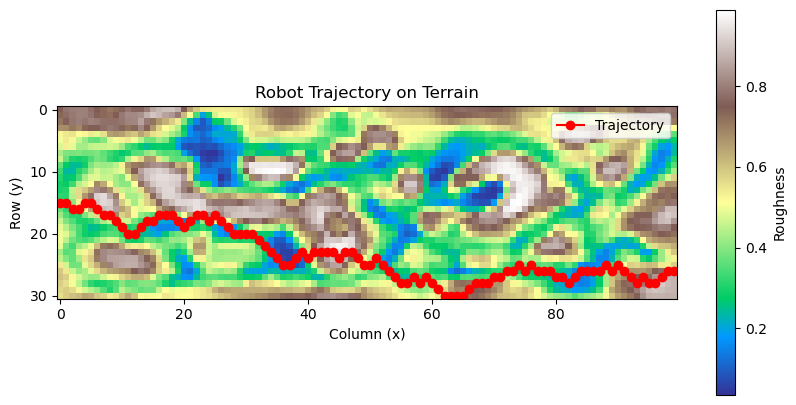

In [20]:
#Random policy
policy = { (i, j): np.random.choice(env.actions) for i in range(31) for j in range(100) }
env = Mountain_one()
#Check the policy evaluation
v_pi_rnd = policy_evaluation2(env, policy, order="left-right")
#plot the trajectory
plot_trajectory(env, policy, (15, 0))  # Start from (15,0)

In [21]:
#v_pi_rnd (15,0) V_pi_str (15,0) ,(3,0)
print(f"Value at (15,0) - Random Policy: {v_pi_rnd[(15,0)]}")
print(f"Value at (15,0) - Straight-Forward Policy: {V_pi_str[(15,0)]}")
print(f"Value at (3,0) - Straight-Forward Policy:: {v_pi_rnd[(3,0)]}")

Value at (15,0) - Random Policy: -22.349020339999996
Value at (15,0) - Straight-Forward Policy: -57.80784459
Value at (3,0) - Straight-Forward Policy:: -17.780392720000005
